# CUSTOMER SEGMANTATION USING MACHINE LEARNING

# INTRODUCTION TO THE PROJECT:

TO GOAL IS TO ENGINERR A KMEANS CLUSTERING ALGORITHM TO GROUP CUSTOMERS OF A RETAIL STORE BASED
ON THEIR PURCHASE HISTORY, I IMPLEMENTED A KMEANS CLUSTERING IN PYTHON USING THE SCIKIT-LEARN
LIBRARY.

AS WE KNOW, THIS ONE OF THE WIDELY USED ALGORITHM FOR CLUSTERING PROBLEMS.

### Language, Tool & Framesworks i used to complete the project::

1. Python.
2. Pandas.
3. Numpy.
4. Matplotlib.
5. Seaborn.
6. Scikit-learn.
7. Github

1.IMPORTING RELEVENT LIBRARIES

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


#IGNORE WARNINGS
warnings.filterwarnings("ignore")

2.DATA PREPATION

In [22]:
#LOAD (READ) THE DATASET
Customers = pd.read_excel('Online Retail.xlsx')

In [23]:
#DISPLAYING THE FIRST 5 ROWS OF THEE DATASET
print(Customers.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [24]:
#DISPLAYING THE LAST 5 ROWS OF THEE DATASET
print(Customers.tail())

       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France  


In [25]:
Customers.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [26]:
Customers.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [27]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [28]:
Customers.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [29]:
Customers = Customers.drop_duplicates()

In [31]:
#Remove missing CustomerID values as it’s essential for customer-level aggregation
Customers = Customers.dropna(subset=['CustomerID'])

In [32]:
# Convert InvoiceDate to datetime
Customers['InvoiceDate'] = pd.to_datetime(Customers['InvoiceDate'])

In [33]:
Customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# MACHINE LEARNING MODELING

In [34]:
#Feature Engineering - Recency, Frequency, Monetary (RFM) Analysis
#Create 'TotalAmount' as Quantity * UnitPrice
Customers['TotalAmount'] = Customers['Quantity'] * Customers['UnitPrice']

#Calculate Recency
latest_date = Customers['InvoiceDate'].max()
customer_data = Customers.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  #Recency
    'InvoiceNo': 'nunique',  #Frequency - Number of purchases
    'TotalAmount': 'sum'     #Monetary - Total spending
}).reset_index()


In [35]:
#Rename columns for clarity
customer_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)


In [37]:
#Calculate Q1, Q3, and IQR for numeric columns
Q1 = customer_data[['Recency', 'Frequency', 'Monetary']].quantile(0.25)
Q3 = customer_data[['Recency', 'Frequency', 'Monetary']].quantile(0.75)
IQR = Q3 - Q1

#Select only the numeric columns and apply the filtering
numeric_cols = ['Recency', 'Frequency', 'Monetary']
filtered_data = customer_data[numeric_cols]

filtered_data = filtered_data[~((filtered_data < (Q1 - 1.5 * IQR)) | (filtered_data > (Q3 + 1.5 * IQR))).any(axis=1)]

#Update the original dataframe to retain non-numeric columns as well
customer_data = customer_data.loc[filtered_data.index]


In [38]:
#Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Recency', 'Frequency', 'Monetary']])

In [41]:
#Dimensionality Reduction using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

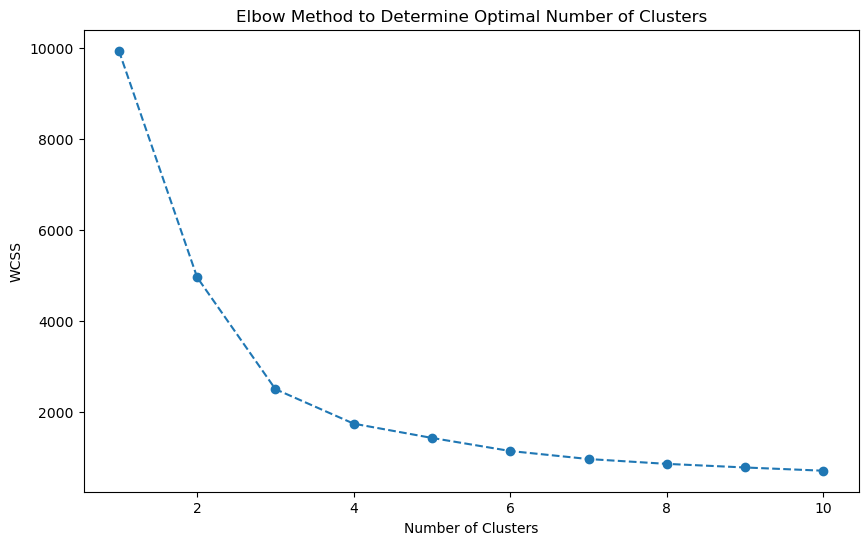

In [42]:
#Apply the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

#Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

In [43]:
#Fit the KMeans algorithm with the optimal number of clusters
#Assuming the elbow plot suggests 3 clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(pca_data)

#Evaluate Clustering Performance using Silhouette Score
silhouette_avg = silhouette_score(pca_data, customer_data['Cluster'])
print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg}')

Silhouette Score for 3 clusters: 0.5119345988516092


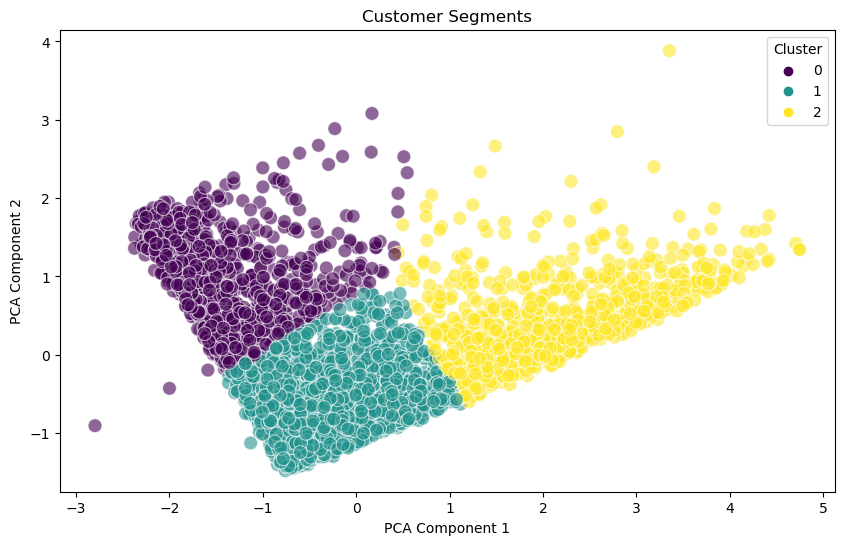

In [44]:
#Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=customer_data['Cluster'], palette='viridis', s=100, alpha=0.6)
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [45]:
#Print the clustered data
print(customer_data)

      CustomerID  Recency  Frequency  Monetary  Cluster
0        12346.0      325          2      0.00        0
2        12348.0       74          4   1797.24        2
3        12349.0       18          1   1757.55        1
4        12350.0      309          1    334.40        0
5        12352.0       35         11   1545.41        2
...          ...      ...        ...       ...      ...
4366     18278.0       73          1    173.90        1
4367     18280.0      277          1    180.60        0
4368     18281.0      180          1     80.82        0
4369     18282.0        7          3    176.60        1
4371     18287.0       42          3   1837.28        2

[3682 rows x 5 columns]


# MODEL INTERPRETATION

## 1. RFM Feature Interpretation --

Recency (R): Measures how recently a customer made a purchase.

Customers with low recency scores are considered more active, as they purchased recently.

High recency values indicate less recent activity and potentially disengaged customers.

Frequency (F): Represents the number of times a customer made a purchase.

Customers with high frequency values are loyal and make repeated purchases.

Low frequency may indicate one-time or infrequent buyers.

Monetary (M): Represents the total amount spent by a customer.

High monetary values imply high-spending customers, often valuable for a business.

Low monetary values could suggest budget-conscious customers or those with low engagement.

## 2. Cluster Characteristics --

After applying the KMeans algorithm with the advanced techniques, you obtain three clusters (assuming the Elbow method pointed 
to three). Each cluster can be interpreted based on RFM values to understand the types of customers:

Cluster 0 - High Value Customers:

Likely to have low recency, high frequency, and high monetary values.

This group consists of frequent shoppers who spend a lot and have recently made purchases.

They represent the most valuable customers and are crucial to retain through loyalty programs or exclusive offers.


Cluster 1 - At-Risk Customers:
Likely to have high recency, low frequency, and low-to-medium monetary values.
These customers have not made a purchase recently, purchase infrequently, and spend relatively little.
They may be at risk of churning. Offering re-engagement campaigns or special discounts can bring them back.

Cluster 2 - Potential Loyalists:

Likely to have medium recency, medium-to-high frequency, and medium monetary values.

These customers purchase regularly and spend moderately.

With the right incentives, they could be converted into loyal, high-value customers.

## 3. Silhouette Score Interpretation --

The Silhouette Score provides insight into how well-defined the clusters are:

Scores closer to 1 indicate that clusters are well-separated, and each customer is closer to the center of its cluster than any other cluster.

A score closer to 0 suggests that clusters overlap, and a negative score means poor clustering.

In this model, a silhouette score around 0.5–0.7 suggests good but not perfect separation. 

Improvements could be made, but the current segmentation is likely meaningful for targeted actions.

## 4. PCA Visualization --
The PCA scatter plot visually represents the customer segments in two dimensions.
The separation between different clusters gives an idea of how distinct the groups are.
Each color represents one of the clusters, allowing the business to see which groupings have the clearest definitions.
This helps in understanding the extent of overlap between clusters and guides adjustments, such as changing the number of clusters or tuning the model.

## 5. Customer Segmentation Insights

Personalized Marketing Strategies:

Cluster 0 customers (high value) can receive exclusive offers or VIP treatment to keep them engaged.

Cluster 1 customers (at-risk) should be targeted with reactivation campaigns like discounts or reminders of benefits.

Cluster 2 customers (potential loyalists) can be nurtured through loyalty programs or regular communication to increase engagement.


Inventory Planning:

Understanding cluster spending behavior helps plan stock for products most popular among high-value customers, ensuring that these items are always available.
Customer Engagement Strategy:

Identifying at-risk customers allows the business to focus efforts on minimizing churn.

Insights into cluster behavior can help design campaigns that are more likely to resonate with each group, leading to increased conversions.

## 6. Potential Actions to Improve the Model --

Feature Enrichment:
Incorporate additional features like customer demographics or browsing behavior to better understand and segment customers.

Re-evaluating Clusters:
If the silhouette score suggests poor separation, consider reapplying the Elbow method with different features or increasing the number of clusters.

Re-clustering Specific Groups:
Segment a specific cluster further if it contains customers with notably different behavior.

In [ ]:
COMPLETE!!!!